In [160]:
import pandas as pd
import random
import numpy as np
import functools
from tqdm import tqdm
import matplotlib.pyplot as plt

from pyflowchart import Flowchart

from sortings import bubble_sort_cython, insertion_sort_cython

In [161]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [162]:
BASE = 2
POWER_MIN = 3
POWER_MAX = 15

Создадим функции для сортировок, которые будут также возвращать число сравнений и перестановок. 

In [163]:
def bubble_sort(lst):
    n = len(lst)
    swaps = 0  
    comparisons = 0  
    for i in range(n):
        for j in range(0, n-i-1):
            comparisons += 1  
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swaps += 1  
    return lst, swaps, comparisons

def insertion_sort(lst):
    swaps = 0  
    comparisons = 0  
    for i in range(1, len(lst)):
        key = lst[i]
        j = i-1
        while j >= 0 and key < lst[j]:
            comparisons += 1  
            lst[j+1] = lst[j]
            swaps += 1 
            j -= 1
        lst[j+1] = key
    return lst, swaps, comparisons

In [164]:
def random_ints(lb, ub, size):
    return random.sample(range(lb, ub), size)

random_ints_medium_range = functools.partial(random_ints, 0, BASE**POWER_MAX + 1)

Для ускорения работы программы были созданы Cython-версии функций для сортировки. Убедимся, что они работают и быстрее и дают тот же результат, что и обычные Python-версии 

In [165]:
test = random_ints_medium_range(5000)

In [166]:
bubble_sort_cython(test.copy()) == bubble_sort(test.copy())

True

In [167]:
insertion_sort_cython(test.copy()) == insertion_sort(test.copy())

True

In [168]:
%timeit insertion_sort_cython(random_ints_medium_range(5000))

892 ms ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
%timeit insertion_sort(random_ints_medium_range(5000))

2.14 s ± 94.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [170]:
%timeit bubble_sort_cython(random_ints_medium_range(5000))

1.79 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [171]:
%timeit bubble_sort(random_ints_medium_range(5000))

4.02 s ± 274 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Создадим функцию, которая проведет заданное число экспериментов с заданной функции для генерации выборки и заданной функцией сортировки. Результаты будем отображать в виде пандас датафрейма

In [172]:
def get_func_name(func):
    if hasattr(func, 'func'):
        return func.func.__name__
    return func.__name__


def run_sorts(sort_func, gen_func, sizes):

    data = []
    for size in tqdm(sizes):
        lst = gen_func(size)
        sorted_lst, swaps, comparisons = sort_func(lst.copy())

        sort_name = get_func_name(sort_func)
        gen_name = get_func_name(gen_func)

        data.append({
            'Size': size,
            'Sort Function': sort_name,
            'Generation Function': gen_name,
            'Swaps': swaps,
            'Comparisons': comparisons
        })
    return pd.DataFrame(data)

Продемонстрируем результат запуска программы

In [173]:
run_sorts(bubble_sort_cython, 
          random_ints_medium_range, 
          [2**x for x in range(POWER_MIN, POWER_MAX)],)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:24<00:00,  2.03s/it]


,Size,Sort Function,Generation Function,Swaps,Comparisons
0,8,bubble_sort_cython,random_ints,17,28
1,16,bubble_sort_cython,random_ints,77,120
2,32,bubble_sort_cython,random_ints,298,496
3,64,bubble_sort_cython,random_ints,1153,2016
4,128,bubble_sort_cython,random_ints,4424,8128
5,256,bubble_sort_cython,random_ints,15788,32640
6,512,bubble_sort_cython,random_ints,64385,130816
7,1024,bubble_sort_cython,random_ints,270012,523776
8,2048,bubble_sort_cython,random_ints,1061238,2096128
9,4096,bubble_sort_cython,random_ints,4138695,8386560


Проведем эксперименты для пузырьковой сортировки и сортировки вставкой

In [174]:
bubble_sort_results = run_sorts(bubble_sort_cython, 
          random_ints_medium_range, 
          [2**x for x in range(POWER_MIN, POWER_MAX)])

insertion_sort_results = run_sorts(insertion_sort_cython, 
          random_ints_medium_range, 
          [2**x for x in range(POWER_MIN, POWER_MAX)])

100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Объединим эти результаты в один датафрейм

In [175]:
combined_sort_results = pd.concat([bubble_sort_results, insertion_sort_results], 
                                  ignore_index=True)

In [176]:
combined_sort_results

,Size,Sort Function,Generation Function,Swaps,Comparisons
0,8,bubble_sort_cython,random_ints,22,28
1,16,bubble_sort_cython,random_ints,57,120
2,32,bubble_sort_cython,random_ints,249,496
3,64,bubble_sort_cython,random_ints,1006,2016
4,128,bubble_sort_cython,random_ints,4061,8128
5,256,bubble_sort_cython,random_ints,16387,32640
6,512,bubble_sort_cython,random_ints,67190,130816
7,1024,bubble_sort_cython,random_ints,260027,523776
8,2048,bubble_sort_cython,random_ints,1033416,2096128
9,4096,bubble_sort_cython,random_ints,4219011,8386560


Создадим функцию для визуализации графиков количества перестановок и сравнений в зависимости от размера выборки для всех представленных в данных алгоритмов

In [177]:
def plot_sort_results(df, colors):
    sort_functions = df['Sort Function'].unique()

    fig, axes = plt.subplots(len(sort_functions), 2, figsize=(6, 6))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    max_swaps = df['Swaps'].max()
    max_comparisons = df['Comparisons'].max()

    for i, sort_function in enumerate(sort_functions):
        df_subset = df[df['Sort Function'] == sort_function]
        axes[i, 0].plot(df_subset['Size'], df_subset['Swaps'], color=colors[sort_function])
        axes[i, 1].plot(df_subset['Size'], df_subset['Comparisons'], color=colors[sort_function], linestyle='--')

        axes[i, 0].set_ylim(0, max_swaps * 1.1)  
        axes[i, 1].set_ylim(0, max_comparisons * 1.1)

    for ax, sort_function in zip(axes[:, 0], sort_functions):
        ax.set_title(f'{sort_function} Swaps')
    for ax, sort_function in zip(axes[:, 1], sort_functions):
        ax.set_title(f'{sort_function} Comparisons')

    for ax in axes.flat:
        ax.legend().remove()

    plt.show()

Визуализируем графики абсолютного числа сравнений и перестановок в зависимости от размера массива. Во всех случаях наблюдаем квадратичную зависимость.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


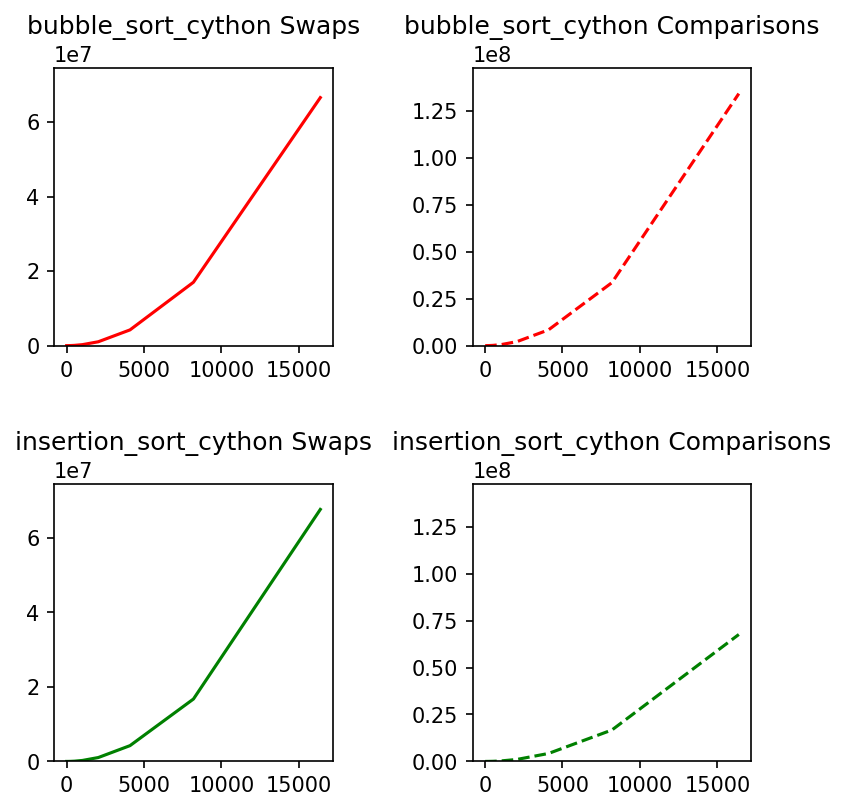

In [178]:
colors = {'bubble_sort_cython': 'r', 'insertion_sort_cython': 'g'}
plot_sort_results(combined_sort_results, colors)

Визуализируем нормированное на размер выборки количество перестановок и сравнений

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


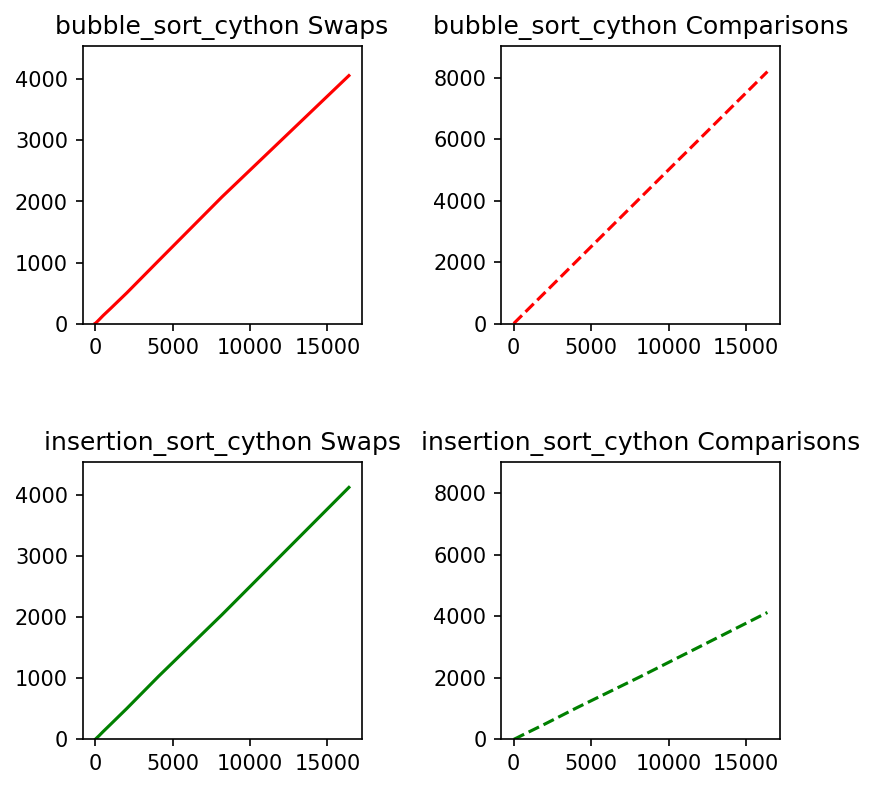

In [179]:
combined_sort_results_relative = combined_sort_results.copy()
combined_sort_results_relative["Swaps"] = combined_sort_results_relative["Swaps"]  / combined_sort_results_relative["Size"] 
combined_sort_results_relative["Comparisons"] = combined_sort_results_relative["Comparisons"]  / combined_sort_results_relative["Size"] 
plot_sort_results(combined_sort_results_relative, colors)

Визуализируем логарифмы числа перестановок и сравнений в зависимости от размера выборки 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


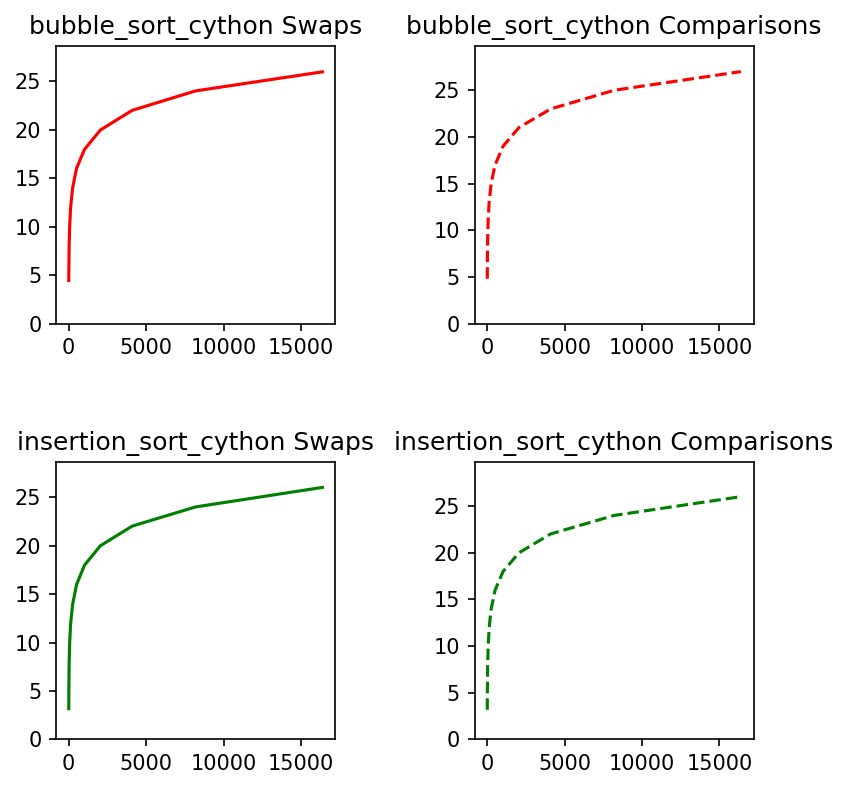

In [180]:
combined_sort_results_logs = combined_sort_results.copy()
combined_sort_results_logs["Swaps"] = np.log2(combined_sort_results_logs["Swaps"])
combined_sort_results_logs["Comparisons"] = np.log2(combined_sort_results_logs["Comparisons"])
plot_sort_results(combined_sort_results_logs, colors)

Наконец, воспользуемся библиотекой Flowchart для генерации кода блок-схемы с дальнейшей визуализацией на сайте https://flowchart.js.org/
Графики прилагаются к файлу

In [181]:
with open('bubble_sort.py') as f:
    code = f.read()
 
fc = Flowchart.from_code(code)
print(fc.flowchart())

st195=>start: start bubble_sort
io197=>inputoutput: input: lst
op200=>operation: n = len(lst)
op202=>operation: swaps = 0
op204=>operation: comparisons = 0
cond207=>condition: for i in range(n)
cond249=>condition: for j in range(0, ((n - i) - 1))
op268=>operation: comparisons += 1
cond271=>condition: if (lst[j] > lst[(j + 1)])
op275=>operation: (lst[j], lst[(j + 1)]) = (lst[(j + 1)], lst[j])
op277=>operation: swaps += 1
io289=>inputoutput: output:  (lst, swaps, comparisons)
e287=>end: end function return

st195->io197
io197->op200
op200->op202
op202->op204
op204->cond207
cond207(yes)->cond249
cond249(yes)->op268
op268->cond271
cond271(yes)->op275
op275->op277
op277->cond249
cond271(no)->cond249
cond249(no)->cond207
cond207(no)->io289
io289->e287



In [182]:
with open('insertion_sort.py') as f:
    code = f.read()
 
fc = Flowchart.from_code(code)
print(fc.flowchart())

st298=>start: start insertion_sort
io300=>inputoutput: input: lst
op303=>operation: swaps = 0
op305=>operation: comparisons = 0
cond308=>condition: for i in range(1, len(lst))
op343=>operation: key = lst[i]
op345=>operation: j = (i - 1)
cond348=>condition: while ((j >= 0) and (key < lst[j]))
op361=>operation: comparisons += 1
op363=>operation: lst[(j + 1)] = lst[j]
op365=>operation: swaps += 1
op367=>operation: j -= 1
op371=>operation: lst[(j + 1)] = key
io378=>inputoutput: output:  (lst, swaps, comparisons)
e376=>end: end function return

st298->io300
io300->op303
op303->op305
op305->cond308
cond308(yes)->op343
op343->op345
op345->cond348
cond348(yes)->op361
op361->op363
op363->op365
op365->op367
op367(left)->cond348
cond348(no)->op371
op371(left)->cond308
cond308(no)->io378
io378->e376

